# Change of Variables

I find changes of variables to be the easiest to understand by writing down a joint probability distribution using a delta function to express the conditional probability for the new variables based on the old variables. The next step is to perform a change of variables in the delta function, and integrate. The delta function means that the relationship between the old and the new variables is deterministic. If the relationship is non-deterministic you can use whatever expression for the conditional probability is appropriate. 

Let's say that you want to know the probability distribution of the function $\vec{u} = \mathbf{H}(\vec{x})$ of some random variable $\vec{x}$ for which the probability distribution is known.

I personally find it least confusing to approach this problem by thinking about the joint probability distribution, and then obtaining $p(\vec{u})$ through marginalization: 

\begin{equation}
p(\vec{u}) = \int dx^n p(\vec{x},\vec{u}) = \int dx^n p_x(\vec{x}) p_u(\vec{u}|\vec{x})
\end{equation}

Since $\vec{u}$ is a deterministic function of $\vec{x}$, the conditional probabiltiy $p_u(\vec{u}|\vec{x}) = \delta(\vec{u} - \mathbf{H}(\vec{x}))$. Explicitly:

\begin{equation}
p(\vec{u}) = \int dx^n p_x(\vec{x}) \delta(\vec{u} - \mathbf{H}(\vec{x}))
\end{equation}

What this does, is to integrate over all the points $p_x(\vec{x})$ where the argument of the delta function is zero. The important thing is that care needs to be taken when the argument of the delta function is itself a function. In that case, a change of variables has to be performed, so that this is no longer the case. On wikipedia, this is done by defining the new variable $du = |\frac{d}{dx}g(x)|dx$, from which follows:

\begin{equation}
\delta(g(x)) = \sum_{x_0} \frac{\delta(x-x_0)}{|g'(x_0)|}
\end{equation}

Where it is necessary to sum over each point $x_0$ for which $g(x_0) = 0$.

Which makes sense. Except, if you rewrite in terms of the new variable, you get an expression that does not strike me as necessarily the same:

\begin{equation}
\int f(x) \delta(g(x))dx = \sum_{n}\int f(g_n^{-1}(u)) \delta(u) \left|\frac{d}{du}g^{-1}(u)\right|du
\end{equation}

Where the sum $n$ is over all functions $g_n^{-1}$ that satisfy $g(g_n^{-1}(u)) = u$. For example, if $u = g(x) = sin(x)$ then $g_n^{-1} = asin(u) + n2\pi$, for any integer $n$. I feel more comfortable with the second path. 

Note that a delta function with a vector argument can be written as a product of the delta functions along each dimension.

Define a new set of variables $\vec{a} = \vec{u} - \mathbf{H}(\vec{x})$. It follows that $\vec{x} = \mathbf{H_n^{-1}}(\vec{u}-\vec{a})$ and the volume element $dx^n = \left| \frac{d}{d\vec{a}}\mathbf{H}_n^{-1}(\vec{u}-\vec{a})\right|da^n$. Here, $H^{-1}_n$ are all the functions that satisfy $\mathbf{H}(\mathbf{H}_n^{-1}(\vec{u})) = \vec{u}$. The integral becomes:

\begin{equation}
p(\vec{u}) = \int da^n p_x(\mathbf{H}^{-1}_n(\vec{u}-\vec{a}))\left| \frac{d}{d\vec{a}}\mathbf{H}_n^{-1}(\vec{u}-\vec{a})\right| \delta(\vec{a})
\end{equation}

At this point it is safe to evaluate the delta function integral. The result is:

\begin{equation}
p(\vec{u}) = p_x(\mathbf{H}^{-1}_n(\vec{u})\left| \frac{d}{d\vec{a}}\mathbf{H}_n^{-1}(\vec{u}-\vec{a})\right|_{(\vec{a}=0)}
\end{equation}

If the map $\mathbf{H}$ is not bijective, for example because $\vec{u}$ has lower dimensionality than $\vec{x}$, then a bijective map can be artifically constructed by introducing additional variables that are then also marginalized out. For example, if the goal is to calculate the probability of measuring some sum of random variables $s$, then you can define:

\begin{equation}
u_0 = s - \sum(x_i)\\
u_1 = x_1\\
u_2 = x_2\\
\vdots\\
u_{(n-1)} = x_{n-1}
\end{equation}

The inverse is:

\begin{equation}
x_1 = u_1\\
x_2 = u_2\\
\vdots\\
x_n = s - u_0 - \sum_{i<n} x_i
\end{equation}

The argument in the delta function is transformed $\delta(s - \sum(x_i)) \rightarrow \delta(u_0)$. The determinant of the Jacobian $|J| = |\frac{d}{d\vec{u}} H^{-1}(\vec{u})|$ is given by $[\frac{d}{du_1} \mathbf{H^{-1}},\frac{d}{du_2} \mathbf{H^{-1}},...,\frac{d}{du_{n-1}} \mathbf{H^{-1}}]$. That's an $nxn$ matrix where the first row is all $-1$, the lower left is an $(n-1)x(n-1)$ identity matrix, and the lower right is a $(n-1)x1$ vector of 0s. The determinant is one. Consequently the probability distribution of measuring a sum $s$ is given by:

\begin{equation}
p(s)= \int dx^{n-1} p_x(x_1,x_2,x_3,...,s-\sum_{x<n}x_i)
\end{equation}

Which turns out to be the convolution when the variables are independent.

## Experiment: Sum of Four Uniformly Distributed Independent Random Variables

I will do this in an inelegant and computationally inefficient way, because it is pedantic.

$p(x) = 1/2$ for $x \in (-1,1)$ and $p(x) = 0$ for $x\notin (-1,1)$.

And:

$p_s(s) = \int dx^{n-1} p(x_1)p(x_2)p(x_3)p(s-x_1-x_2-x_3)$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform

def p_x(x):
    """
    Probability density function for a single variable
    """
    if np.abs(x) < 1:
        return 1/2
    else:
        return 0
    
def convolution(f1,f2,s):
    """
    Convolution for dummies
    """
    
    D = 200
    x_values = np.linspace(-5,5,D)
    
    f1x_values = np.array([f1(x) for x in x_values])
    f2z_x_values = np.array([f2(s-x) for x in x_values])
    
    return np.sum(f1x_values*f2z_x_values)/D
    
    
def p_s(s):
    """
    Probability density function of the sum
    """
    s2 = lambda s: convolution(p_x,p_x,s)
    
    return convolution(s2,s2,s)

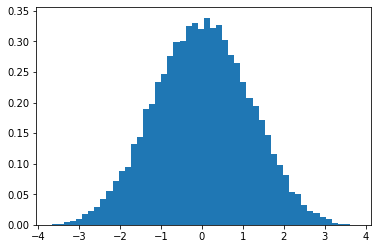

In [2]:
N = 50

data = np.sum(np.vstack([uniform(-1,1,30000) for i in range(4)]),axis=0)
counts,bins, _ = plt.hist(data,density=True,bins=N)


p_s_values = np.array([p_s(s) for s in bins])

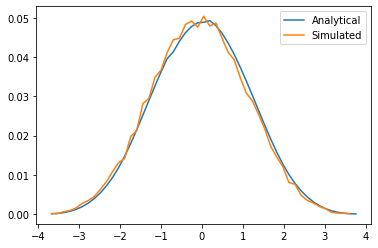

In [3]:
plt.plot(bins,p_s_values/np.sum(p_s_values))
plt.plot(bins[:-1],counts/np.sum(counts))
plt.legend(['Analytical','Simulated'])

## Experiment: Sine and Cosine

Assume $x,y$ are sampled from a standard normal distribution with standard deviation $\pi$. Assume $u = cos(x)$ and $v = sin(x)$.

Then, the joint probability distribution is:

\begin{equation}
p(u,v) = \sum_{n,m} p( acos(u)+n2\pi)p(asin(v) + m2\pi) \frac{1}{|\sqrt{1-u^2}\sqrt{1-v^2}|}
\end{equation}

Or (following the other path with the delta functions)

\begin{equation}
p(u,v) = \sum_{n,m} p( acos(u)+n2\pi)p(asin(v) + m2\pi) \frac{1}{|sin(acos(u))cos(asin(v))|}
\end{equation}

Both are weird, but it turns out to be correct (at least, the shape is: admittedly I did not bother to check proper normalization). 

Super non-inuitive -- this distribution is only intuitive when the standard veriation of $x,y << \pi$. After that, it becomes sharply peaked for $u,v \in -1,1$

Text(0.5, 1.0, 'Analytical')

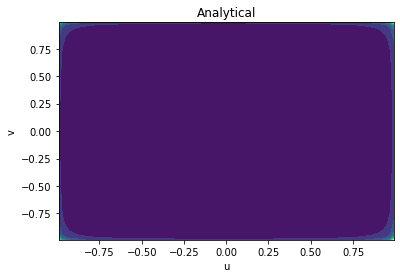

In [4]:
def p(x):
    std = 1*np.pi
    mu = 0
    return (1/np.sqrt(2*np.pi*std)) * np.exp(-0.5*(x-mu)**2/std**2)



def p_uv(u,v):
    
    N = 5
    M = 5
    
    p_ = 0*u
    for n in range(-N,N):
        for m in range(-M,M):
            p_ += p(np.arccos(u)+n*2*np.pi)*p(np.arcsin(v)+m*2*np.pi)
    
    a = 1/(np.sqrt(1-u**2))
    b = 1/(np.sqrt(1-v**2))
    #a = np.abs(1/np.sin(np.arccos(u)))
    #b = np.abs(1/np.cos(np.arcsin(v)))
    
    return a*b*p_
    
    
u_vals,v_vals = np.linspace(-0.99,0.99,100),np.linspace(-0.99,0.99,100)

U,V = np.meshgrid(u_vals,v_vals)

p_uv_vals = p_uv(U,V)
p_uv_vals = p_uv_vals #/np.sum(p_uv_vals)

plt.contourf(U,V,p_uv_vals)
plt.xlabel('u')
plt.ylabel('v')
plt.title('Analytical')

Text(0.5, 1.0, 'Simulated')

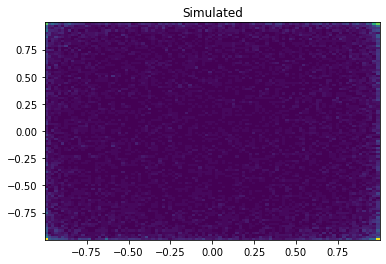

In [5]:
from numpy.random import randn

std = 1*np.pi
x = 0+std*randn(10000)
y = 0+std*randn(10000)

u = np.cos(x)
v = np.sin(y)

counts, xbins, ybins, _ = plt.hist2d(u,v,bins=100)
plt.title('Simulated')

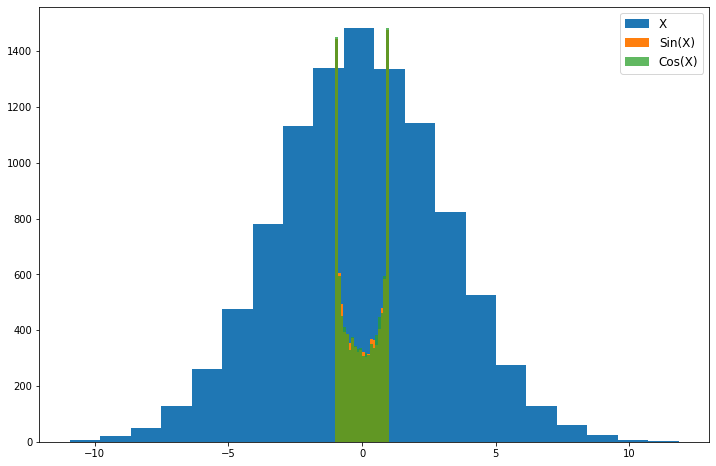

In [6]:
plt.figure(figsize=(12,8))
_ = plt.hist(x,bins=20)
_ = plt.hist(np.sin(x),bins=20,alpha=1)
_ = plt.hist(np.cos(x),bins=20,alpha=0.75)

plt.legend(['X','Sin(X)','Cos(X)'],fontsize=12)

## Example: Lower-Dimensional Variable

This was already the case for the average of several random variables, in which case the dimensionality of the problem was reduced from many to one. 

Consider the case many to fewer. Again, you just need to perform a change of variables. The new set of variables needs to have the same dimensionality as the old set of variables. The rest should follow pretty obviously. 

Linear example: $\vec{y} = \mathbf{M}\vec{x}$ where $y$ has 2 dimensions and $x$ has 3. 

Transform:

\begin{equation}
u_1 = y_1 - \vec{M_1}\cdot\vec{x}\\
u_2 = y_2 - \vec{M_2}\cdot\vec{x}\\
u_3 = x_3
\end{equation}

You can write this in terms of some invertible matrix $\mathbf{W} = [\mathbf{M},[0,0,1]]$ as $\vec{u} = \mathbf{W}\vec{x}$, so that $dx^n = |\mathbf{W}^{-1}|du^n|. The integral is then:

\begin{equation}
p(y) = \int du^n p_x(\mathbf{W}^{-1}(\vec{y}-\vec{u}))\delta(u_1)\delta(u_2)|\mathbf{W}^{-1}|
\end{equation}

## Discrete Variables

In the case of discrete variables the pattern is the same. It's sums instead of integreals, and the change of variables is easier because there is no volume element involved.